In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
Iris_data=pd.read_csv("IRIS.csv")

In [38]:
Iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
Iris_data.shape


(150, 5)

In [40]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
Iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\CZ3\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CZ3\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\CZ3\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


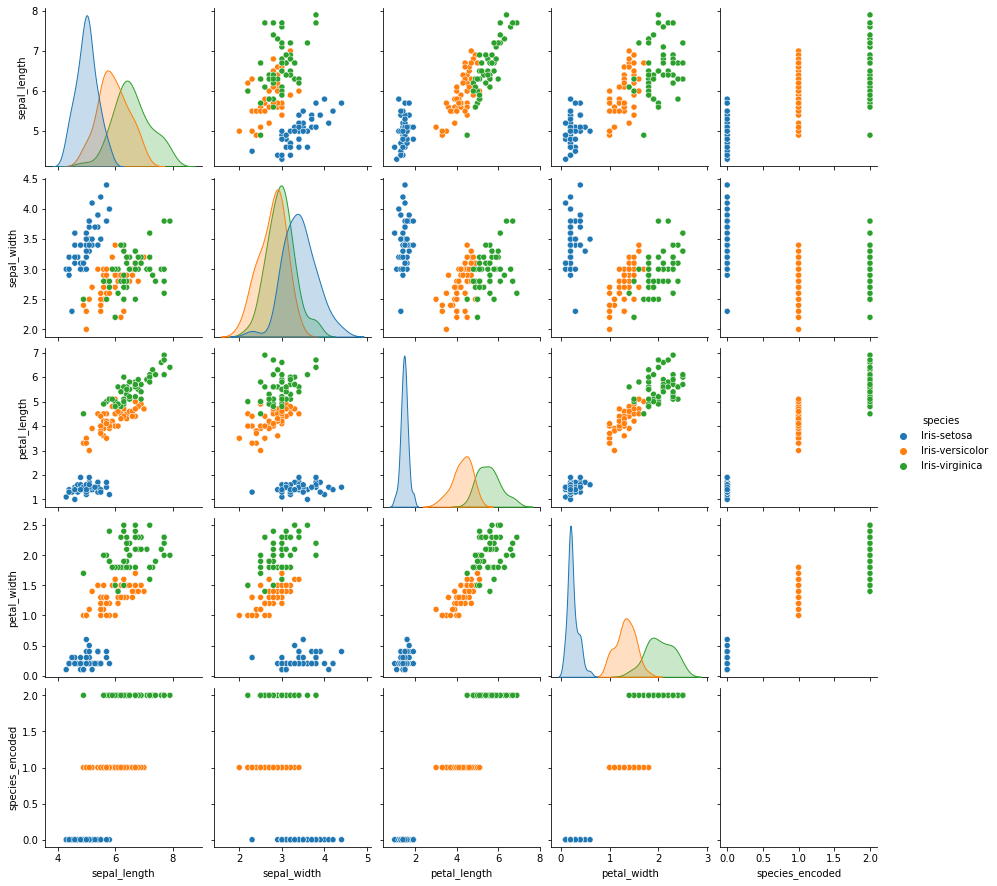

In [97]:
sns.pairplot(Iris_data,hue='species')


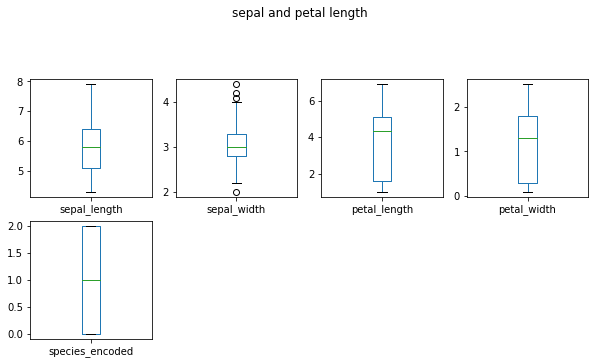

In [142]:
Iris_data.plot(kind='box', subplots= True, layout=(4,4),sharex=False,figsize=(10,10)
               ,sharey=False,title='sepal and petal length')

plt.show()


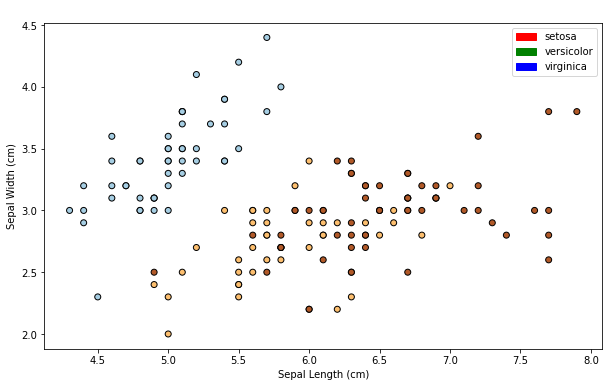

In [138]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
le = LabelEncoder()
Iris_data['species_encoded'] = le.fit_transform(Iris_data['species'])


plt.figure(figsize=(10, 6))
scatter=plt.scatter(Iris_data['sepal_length'], Iris_data['sepal_width'], c=Iris_data['species_encoded'], cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width',color='white')
legend_handles = [mpatches.Patch(color=color, label=species) for species, color in colors.items()]

plt.legend(handles=legend_handles)
plt.show()

In [64]:
X = Iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = Iris_data['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pred_knn = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

In [100]:
print(f"Accuracy Score: {accuracy_knn:.2f}")

print(conf_matrix_knn)
print("\n Model Classification Report:")
print(class_report_knn)

Accuracy Score: 1.00
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Model Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [145]:
y_pred2_knn = model.predict(X_train)
print(accuracy_score(y_train,y_pred2_knn))

0.9416666666666667


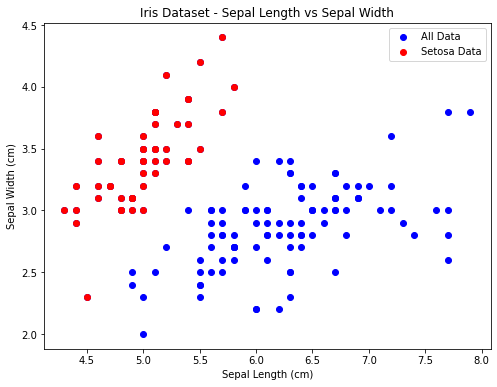

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [163]:
iris_setosa_dataset = Iris_data[Iris_data.petal_length <= 2.45]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Iris_data['sepal_length'], Iris_data['sepal_width'], c='blue', label='All Data')
plt.scatter(iris_setosa_dataset['sepal_length'], iris_setosa_dataset['sepal_width'], c='red', label='Setosa Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Save the filtered dataset to Excel and CSV
iris_setosa_dataset.to_excel('IRIS_setosa_dataset.xlsx', index=False)
iris_setosa_dataset.to_csv('IRIS_setosa_dataset.csv', index=False)

# Read and display the Excel file
pd.read_excel('IRIS_setosa_dataset.xlsx')

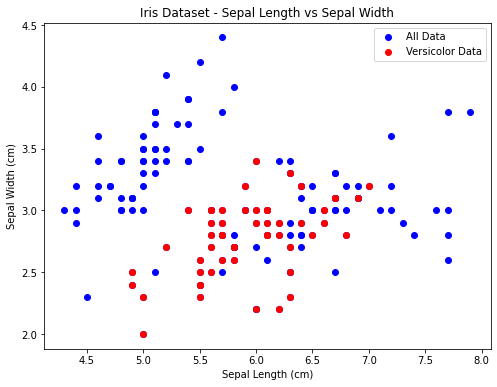

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,7.0,3.2,4.7,1.4,Iris-versicolor,1
1,6.4,3.2,4.5,1.5,Iris-versicolor,1
2,6.9,3.1,4.9,1.5,Iris-versicolor,1
3,5.5,2.3,4.0,1.3,Iris-versicolor,1
4,6.5,2.8,4.6,1.5,Iris-versicolor,1
5,5.7,2.8,4.5,1.3,Iris-versicolor,1
6,6.3,3.3,4.7,1.6,Iris-versicolor,1
7,4.9,2.4,3.3,1.0,Iris-versicolor,1
8,6.6,2.9,4.6,1.3,Iris-versicolor,1
9,5.2,2.7,3.9,1.4,Iris-versicolor,1


In [187]:
iris_versicolor_dataset = Iris_data[(Iris_data['petal_length'] < 5) & (Iris_data['petal_length'] > 3)]

plt.figure(figsize=(8, 6))
plt.scatter(Iris_data['sepal_length'], Iris_data['sepal_width'], c='blue', label='All Data')
plt.scatter(iris_versicolor_dataset['sepal_length'], iris_versicolor_dataset['sepal_width'], c='red', label='Versicolor Data')  # Fix the variable name here
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.show()

iris_versicolor_dataset.to_excel('iris_versicolor_dataset.xlsx', index=False)
iris_versicolor_dataset.to_csv('iris_versicolor_dataset.csv', index=False)
pd.read_excel('iris_versicolor_dataset.xlsx')


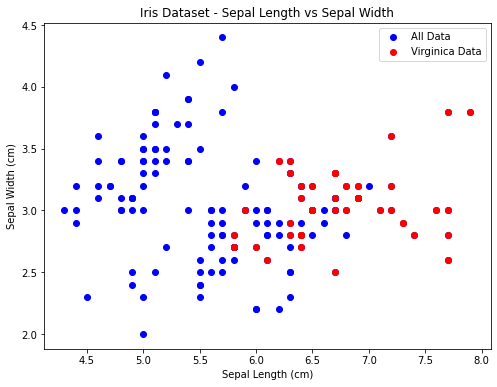

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,6.0,2.7,5.1,1.6,Iris-versicolor,1
1,6.3,3.3,6.0,2.5,Iris-virginica,2
2,5.8,2.7,5.1,1.9,Iris-virginica,2
3,7.1,3.0,5.9,2.1,Iris-virginica,2
4,6.3,2.9,5.6,1.8,Iris-virginica,2
5,6.5,3.0,5.8,2.2,Iris-virginica,2
6,7.6,3.0,6.6,2.1,Iris-virginica,2
7,7.3,2.9,6.3,1.8,Iris-virginica,2
8,6.7,2.5,5.8,1.8,Iris-virginica,2
9,7.2,3.6,6.1,2.5,Iris-virginica,2


In [186]:
iris_virginica_dataset = Iris_data[Iris_data['petal_length'] > 5]

plt.figure(figsize=(8, 6))
plt.scatter(Iris_data['sepal_length'], Iris_data['sepal_width'], c='blue', label='All Data')
plt.scatter(iris_virginica_dataset['sepal_length'], iris_virginica_dataset['sepal_width'], c='red', label='Virginica Data')  # Fix the variable name here
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.show()
iris_virginica_dataset.to_excel('iris_virginica_dataset.xlsx', index=False)
iris_virginica_dataset.to_csv('iris_virginica_dataset.csv', index=False)
pd.read_excel('iris_virginica_dataset.xlsx')
